In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reference : SIGNATE Quest 評価関数
https://quest.signate.jp/quests/10011#mission_step_2

# 回帰

## MAE(Mean Absolute Error)
MAEは次のように定義される. ただし, Nはサンプル数, $\hat{y_i}$はモデルの予測値, $y_i$は実測値とする. MAEは実測値と予測値の誤差の絶対値を測定する. MAEの値が小さいほど精度が良い. 
$$MAE = \frac{1}{N} \sum_{i=1}^{N} |y_i-\hat{y_i}| $$

## RMSE(Root Mean Squared Error)
RMSEは次のように定義される. RMSEは実測値と予測値の誤差の2乗をもとに算出される. RMSEの値が小さいほど精度が高いが, 誤差を2乗しているため外れ値があると値が大きくなる.

$$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y_i})^2}$$

## MAEとRMSEの比較

In [2]:
df1 = pd.read_csv("eval_data1.csv")
df1

,NUM,obs,ypred1,ypred2,ypred3
0,0,2,3,3,3
1,1,6,7,9,7
2,2,1,2,2,2
3,3,9,10,10,10
4,4,6,7,7,7
5,5,7,8,8,17
6,6,12,13,13,13


外れ値がなく, 予測誤差が均一なデータの場合
MAE :  1.0
RMSE :  1.0


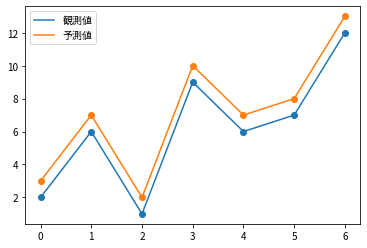

外れ値があり, 外れ値以外の予測誤差が均一なデータの場合1
MAE :  1.2857142857142858
RMSE :  1.4638501094227998


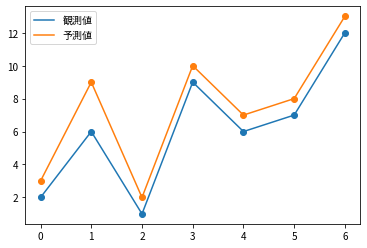

外れた値があり, 外れ値以外の予測誤差が均一なデータの場合2
MAE :  2.2857142857142856
RMSE :  3.8913824205360674


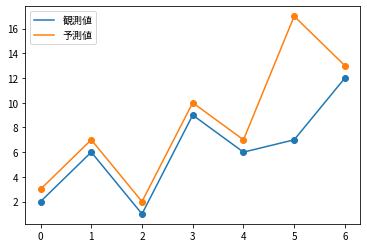

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def root_mean_squared_error(y_true,y_pred):
    """RMSEを計算する関数"""
    return np.sqrt(mean_squared_error(y_true,y_pred))

def gen_graph(x,y_true,y_pred):
    """評価関数を比較するための関数
    
    Args:
    x:独立変数
    y_true:観測値
    y_pred:予測値
    
    Return:
    None
    """
    
    # 評価関数の計算
    mae = mean_absolute_error(y_true,y_pred)
    rmse = root_mean_squared_error(y_true,y_pred)
    print("MAE : ",mae)
    print("RMSE : ",rmse)
    
    # グラフの描画
    plt.figure(facecolor="white")
    plt.plot(x,y_true,label="観測値")
    plt.scatter(x,y_true)
    plt.plot(x,y_pred,label="予測値")
    plt.scatter(x,y_pred)
    plt.legend()
    plt.show()
    
print("外れ値がなく, 予測誤差が均一なデータの場合")
gen_graph(df1["NUM"],df1["obs"],df1["ypred1"])
print("外れ値があり, 外れ値以外の予測誤差が均一なデータの場合1")
gen_graph(df1["NUM"],df1["obs"],df1["ypred2"])
print("外れた値があり, 外れ値以外の予測誤差が均一なデータの場合2")
gen_graph(df1["NUM"],df1["obs"],df1["ypred3"])

上の3つの例からMAEとRMSEの違いについて考察する. 外れ値がなく, 予測誤差が均一なデータの場合, MAEとRMSEの値は同じになることがわかる. 外れ値があり, 外れ値以外の予測誤差が均一なデータの場合, 外れ値の大きさに応じてRMSEが大きくなる(=評価が悪くなる)ことがわかる. このことから, RMSEは予測の大きな誤差を重要視するため, 大きな予測誤差を出したくないタスクで有効であることが考えられる.

## MAPE(Mean Absolute Percentage Error)
MAPEは次のように定義される. MAPEは実測値に対する「誤差の割合」ををもとに算出する指標であり, 値が0に小さいほどモデルの予測精度が高いといえる. MAPEはスケールが異なるデータの誤差を比較しやすい, 実測値に0が含まれていると使用できないという特徴がある.

$$MAPE =\frac{100}{N} \sum_{i=1}^{N}|\frac{y_i-\hat{y_i}}{y_i}|$$ 

In [16]:
df2 = pd.read_csv("eval_data2.csv")
df2

,NUM,obs1,obs2,ypred1,ypred2
0,0,100,100,120,120
1,1,100,100,120,120
2,2,100,100,80,80
3,3,100,100,80,80
4,4,100,10000,120,12000


In [21]:
def mean_absolute_percentage_error(y_true,y_pred):
    """MAPEを計算する関数"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
print("観測値obs1, 予測値ypred1のとき")
print("MAE : ",mean_absolute_error(df2["obs1"],df2["ypred1"]))
print("MAPE : ",mean_absolute_percentage_error(df2["obs1"],df2["ypred1"]))

print("観測値obs2, 予測値ypred2のとき")
print("MAE : ",mean_absolute_error(df2["obs2"],df2["ypred2"]))
print("MAPE : ",mean_absolute_percentage_error(df2["obs2"],df2["ypred2"]))

観測値obs1, 予測値ypred1のとき
MAE :  20.0
MAPE :  20.0
観測値obs2, 予測値ypred2のとき
MAE :  416.0
MAPE :  20.0


上の実行結果からわかるように, 観測値のスケールに変化がないときは, MAEとMAPEが同じになる. 一方で10000,12000というスケールの異なるデータがあるとき, MAEはスケールの異なるデータの影響を受けて大きくなるがm MAPEはスケールの影響を受けない. 

## 決定係数(coefficient of determination)
決定係数$R^2$は次のように定義される. 決定係数は「データのばらつき」と「予測値のずれ」から算出される指標で, モデルの予測値の当てはまり度合いを評価する. 値が1に近いほど予測精度が高く, 予測精度が悪いときは値が負になることもある.

$$R^2 = \frac{\sum_{i=1}^{N} (\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{N} (y_i-\bar{y})^2}$$

# 分類

In [2]:
# MNISTデータ読み込み
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,)
X,y = mnist["data"],mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [3]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]
y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")

In [4]:
# 手書きデータが5かそれ以外かを判別する二項分類器
# 確率的勾配降下法(SGD)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5,tol=-np.infty,random_state=42,n_jobs=-1)
sgd_clf.fit(X_train,y_train_5)

# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(random_state=42,n_jobs=-1)
rfc_clf.fit(X_train,y_train_5)

RandomForestClassifier(n_jobs=-1, random_state=42)

## Accuracy, Precision, Recall, F-value

混同行列 : 分類結果をPositive(正解)とNegative(不正解)にわけ, 正解ラベルと予測ラベルの組から表を作成したもの.

|   |  予測がPositive  |  予測がNegative  |
| ---- | ---- | ---- |
| 正解がPositive | True Positive(TP);真陽性 | False Negative(FN);偽陰性 |
| 正解がNegative | False Positive(FP);偽陽性 | True Negative(TN);真陰性 |

### Accuracy
Accuracyは予測結果が実際にあたっていた割合のことで, 次のように定義される. 分かりやすい指標であるがAccuracyのみでモデルの精度を判断するのは危険である.
$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

y_train_pred_sgd = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
y_train_pred_rfc = cross_val_predict(rfc_clf,X_train,y_train_5,cv=3)

scores_sgd = cross_val_score(sgd_clf,X_train,y_train_5, cv=3,scoring="accuracy",n_jobs=-1)
scores_rfc = cross_val_score(rfc_clf,X_train,y_train_5, cv=3,scoring="accuracy",n_jobs=-1)
print("accuracy SGD : ",scores_sgd)
print("accuracy RFC : ",scores_rfc)

accuracy SGD :  [0.9146  0.9631  0.95455]
accuracy RFC :  [0.98815 0.9873  0.9884 ]


### Precision
Precision(適合率)は陽性であると判断したもののうち実際に陽性であった割合を表し, 次のように定義される. Precisionは誤判定を少なくしたいときに用いる.
$$Precision = \frac{TP}{TP+FP}$$

### Recall
Recall(再現率)は実際に陽性であるもののうち, 正しく陽性と判断できている割合を表したもので, 次に示すように定義される. Recallは抜けがなく正誤判定をしたいときに用いる.
$$Recall = \frac{TP}{TP+FN}$$

PrecisionとRecallにはトレードオフの関係がある. モデルがインスタンスを陽性と判断する閾値を大きくすると, Presicionは高く, Recallは低くなる.
閾値を低くすると, Presicionは低く, Recallは高くなる. 

In [8]:
from sklearn.metrics import precision_score,recall_score

print("SGD")
print("Precision : ",precision_score(y_train_5,y_train_pred_sgd))
print("Recall : ",recall_score(y_train_5,y_train_pred_sgd))
print("RFC")
print("Precision : ",precision_score(y_train_5,y_train_pred_rfc))
print("Recall : ",recall_score(y_train_5,y_train_pred_rfc))

SGD
Precision :  0.6787815853236414
Recall :  0.7234827522597307
RFC
Precision :  0.9895789912463526
Recall :  0.8758531636229479


### F-value
F-valueは次に示すように定義される(PrecisionとRecallの調和平均), PrecisionとRecallの両方を加味した評価関数である. 0から1の値をとり値が大きいほど予測精度が高い.

$$F = \frac{2 × Precision × Recall}{Precision+Recall}$$

In [9]:
from sklearn.metrics import f1_score

print("SGD")
print("F値 : ",f1_score(y_train_5,y_train_pred_sgd))
print("RFC")
print("F値 : ",f1_score(y_train_5,y_train_pred_rfc))

SGD
F値 :  0.7004196803286008
RFC
F値 :  0.9292494373226343


## ROC曲線とAUC
### ROC曲線
ROC曲線は2値分類問題で閾値を変化させたときにモデルの性能がどのように変化するかを表したものである.横軸に偽陽性率(FPR),てて軸に真陽性率(Recall)をとり, 閾値を変化させたときのFPR, Recallをプロットする. 一般的には真陽性率が高い, つまり上に凸になるようなカーブを描くことが理想的といえる.

### AUC(Area Under the Curve)
AUCはROC曲線と以下の領域面積を表している. AUCは0～1の値をとり, 値が大きいほどモデルの予測精度が良いといえる.

In [10]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

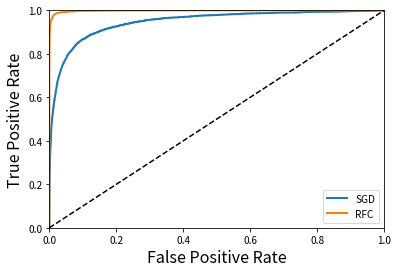

In [11]:
from sklearn.metrics import roc_curve

# SGD
# method : decision_functionを指定することで確率を返す.
scores_sgd = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
fpr_sgd,tpr_sgd,thresholds_sgd = roc_curve(y_train_5,scores_sgd)
# RFC
scores_rfc =  cross_val_predict(rfc_clf,X_train,y_train_5,cv=3,method="predict_proba")
fpr_rfc,tpr_rfc,thresholds_rfc = roc_curve(y_train_5,scores_rfc[:,1])

plt.figure(facecolor="white")
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, label="SGD")
plot_roc_curve(fpr_rfc,tpr_rfc,label="RFC")
plt.legend()
plt.show()

In [12]:
# AUC
from sklearn.metrics import roc_auc_score
print("AUC(SGD) : ",roc_auc_score(y_train_5,scores_sgd))
print("AUC(RFC) : ",roc_auc_score(y_train_5,scores_rfc[:,1]))

AUC(SGD) :  0.9466250659460002
AUC(RFC) :  0.9984122853973184
